# Loading Library and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
data_ori = pd.read_csv('dataset/daily_electricity_usage.csv')
data_ori['date'] = pd.to_datetime(data_ori['date'])

In [3]:
data_ori.head()

,Meter ID,date,total daily KW
0,1000,2009-07-14,11.203
1,1000,2009-07-15,8.403
2,1000,2009-07-16,7.225
3,1000,2009-07-17,11.338
4,1000,2009-07-18,11.306


The given dataset contains 6445 IDs from ID 1000 to ID 7444. The dataset provide daily electricity usage from July 14, 2009 to December 31, 2010. The costumers are not only from housing but also companys.

# 1. Preprocessing Data

## Splitting data per costumer 

In [4]:
data = pd.DataFrame({'date':pd.date_range('2009-07-14',periods=536,freq='D',)})
for i in range(1000,7445):
    S=data_ori[data_ori['Meter ID']==i][['date','total daily KW']]
    data=pd.merge(data,S,how='left',on='date')
for i in range(1,6446):
    data.columns.values[i]="ID"+str(999+i)

In [5]:
data.head()

,date,ID1000,ID1001,ID1002,ID1003,ID1004,ID1005,ID1006,ID1007,ID1008,ID1009,ID1010,ID1011,ID1012,ID1013,ID1014,ID1015,ID1016,ID1017,ID1018,ID1019,ID1020,ID1021,ID1022,ID1023,ID1024,ID1025,ID1026,ID1027,ID1028,ID1029,ID1030,ID1031,ID1032,ID1033,ID1034,ID1035,ID1036,ID1037,ID1038,ID1039,ID1040,ID1041,ID1042,ID1043,ID1044,ID1045,ID1046,ID1047,ID1048,ID1049,ID1050,ID1051,ID1052,ID1053,ID1054,ID1055,ID1056,ID1057,ID1058,ID1059,ID1060,ID1061,ID1062,ID1063,ID1064,ID1065,ID1066,ID1067,ID1068,ID1069,ID1070,ID1071,ID1072,ID1073,ID1074,ID1075,ID1076,ID1077,ID1078,ID1079,ID1080,ID1081,ID1082,ID1083,ID1084,ID1085,ID1086,ID1087,ID1088,ID1089,ID1090,ID1091,ID1092,ID1093,ID1094,ID1095,ID1096,ID1097,ID1098,ID1099,ID1100,ID1101,ID1102,ID1103,ID1104,ID1105,ID1106,ID1107,ID1108,ID1109,ID1110,ID1111,ID1112,ID1113,ID1114,ID1115,ID1116,ID1117,ID1118,ID1119,ID1120,ID1121,ID1122,ID1123,ID1124,ID1125,ID1126,ID1127,ID1128,ID1129,ID1130,ID1131,ID1132,ID1133,ID1134,ID1135,ID1136,ID1137,ID1138,ID1139,ID1140,ID1141,ID1142,ID1143,ID1144,ID1145,ID1146,ID1147,ID1148,ID1149,ID1150,ID1151,ID1152,ID1153,ID1154,ID1155,ID1156,ID1157,ID1158,ID1159,ID1160,ID1161,ID1162,ID1163,ID1164,ID1165,ID1166,ID1167,ID1168,ID1169,ID1170,ID1171,ID1172,ID1173,ID1174,ID1175,ID1176,ID1177,ID1178,ID1179,ID1180,ID1181,ID1182,ID1183,ID1184,ID1185,ID1186,ID1187,ID1188,ID1189,ID1190,ID1191,ID1192,ID1193,ID1194,ID1195,ID1196,ID1197,ID1198,ID1199,ID1200,ID1201,ID1202,ID1203,ID1204,ID1205,ID1206,ID1207,ID1208,ID1209,ID1210,ID1211,ID1212,ID1213,ID1214,ID1215,ID1216,ID1217,ID1218,ID1219,ID1220,ID1221,ID1222,ID1223,ID1224,ID1225,ID1226,ID1227,ID1228,ID1229,ID1230,ID1231,ID1232,ID1233,ID1234,ID1235,ID1236,ID1237,ID1238,ID1239,ID1240,ID1241,ID1242,ID1243,ID1244,ID1245,ID1246,ID1247,ID1248,...,ID7195,ID7196,ID7197,ID7198,ID7199,ID7200,ID7201,ID7202,ID7203,ID7204,ID7205,ID7206,ID7207,ID7208,ID7209,ID7210,ID7211,ID7212,ID7213,ID7214,ID7215,ID7216,ID7217,ID7218,ID7219,ID7220,ID7221,ID7222,ID7223,ID7224,ID7225,ID7226,ID7227,ID7228,ID7229,ID7230,ID7231,ID7232,ID7233,ID7234,ID7235,ID7236,ID7237,ID7238,ID7239,ID7240,ID7241,ID7242,ID7243,ID7244,ID7245,ID7246,ID7247,ID7248,ID7249,ID7250,ID7251,ID7252,ID7253,ID7254,ID7255,ID7256,ID7257,ID7258,ID7259,ID7260,ID7261,ID7262,ID7263,ID7264,ID7265,ID7266,ID7267,ID7268,ID7269,ID7270,ID7271,ID7272,ID7273,ID7274,ID7275,ID7276,ID7277,ID7278,ID7279,ID7280,ID7281,ID7282,ID7283,ID7284,ID7285,ID7286,ID7287,ID7288,ID7289,ID7290,ID7291,ID7292,ID7293,ID7294,ID7295,ID7296,ID7297,ID7298,ID7299,ID7300,ID7301,ID7302,ID7303,ID7304,ID7305,ID7306,ID7307,ID7308,ID7309,ID7310,ID7311,ID7312,ID7313,ID7314,ID7315,ID7316,ID7317,ID7318,ID7319,ID7320,ID7321,ID7322,ID7323,ID7324,ID7325,ID7326,ID7327,ID7328,ID7329,ID7330,ID7331,ID7332,ID7333,ID7334,ID7335,ID7336,ID7337,ID7338,ID7339,ID7340,ID7341,ID7342,ID7343,ID7344,ID7345,ID7346,ID7347,ID7348,ID7349,ID7350,ID7351,ID7352,ID7353,ID7354,ID7355,ID7356,ID7357,ID7358,ID7359,ID7360,ID7361,ID7362,ID7363,ID7364,ID7365,ID7366,ID7367,ID7368,ID7369,ID7370,ID7371,ID7372,ID7373,ID7374,ID7375,ID7376,ID7377,ID7378,ID7379,ID7380,ID7381,ID7382,ID7383,ID7384,ID7385,ID7386,ID7387,ID7388,ID7389,ID7390,ID7391,ID7392,ID7393,ID7394,ID7395,ID7396,ID7397,ID7398,ID7399,ID7400,ID7401,ID7402,ID7403,ID7404,ID7405,ID7406,ID7407,ID7408,ID7409,ID7410,ID7411,ID7412,ID7413,ID7414,ID7415,ID7416,ID7417,ID7418,ID7419,ID7420,ID7421,ID7422,ID7423,ID7424,ID7425,ID7426,ID7427,ID7428,ID7429,ID7430,ID7431,ID7432,ID7433,ID7434,ID7435,ID7436,ID7437,ID7438,ID7439,ID7440,ID7441,ID7442,ID7443,ID7444
0,2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,51.865,38.259,49.387,95.929,16.889,34.085,15.670,5.002,16.193,50.537,23.977,30.642,19.102,18.392,68.649,11.801,2.838,35.990,6.592,239.145,3.603,18.871,3.956,13.588,41.499,49.974,7.619,8.634,11.457,278.584,32.991,39.802,11.023,46.689,12.175,51.948,11.422,23.255,23.480,28.941,6.796,36.809,33.035,15.206,14.339,8.225,49.221,139.751,34.405,13.358,34.338,4.919,19.160,21.257,25.373,33.999,4.265,NaN,21.095,30.803,1.794,NaN,10.6

## Handling missing data

In [6]:
data.isnull().sum().sum()

163262

In [7]:
data = data.fillna(data.mean())

The dataset contains 163.262 missing data because:
1. there are new costumers in the middle of observation period;
2. there are some Meter IDs between 1000-7444 not observed; or
3. there are some meter IDs that stop to be member in the middle of observation period.

# 1. Segmentation

## Preparing features for Segmentation 

In [8]:
data.date = pd.to_datetime(data.date)
data['day'] = data['date'].apply(lambda x:x.weekday())
x_call = data.columns[1:-1]

In [9]:
data_fix = pd.DataFrame({'Meter ID':range(1000,7445,1),'total KW':np.sum(data[x_call]).values})
data_fix['average per day']=data[x_call].mean().values
data_fix['% Monday']=data[data['day']==0][x_call].sum().values/data_fix['total KW']*100
data_fix['% Tuesday']=data[data['day']==1][x_call].sum().values/data_fix['total KW']*100
data_fix['% Wednesday']=data[data['day']==2][x_call].sum().values/data_fix['total KW']*100
data_fix['% Thursday']=data[data['day']==3][x_call].sum().values/data_fix['total KW']*100
data_fix['% Friday']=data[data['day']==4][x_call].sum().values/data_fix['total KW']*100
data_fix['% Saturday']=data[data['day']==5][x_call].sum().values/data_fix['total KW']*100
data_fix['% Sunday']=data[data['day']==6][x_call].sum().values/data_fix['total KW']*100
data_fix['% weekday']=data[(data['day']!=5)&(data['day']!=6)][x_call].sum().values/data_fix['total KW']*100
data_fix['% weekend']=data[(data['day']==5)|(data['day']==6)][x_call].sum().values/data_fix['total KW']*100

In [10]:
data_fix=data_fix.fillna(0)
data_fix.head()

,Meter ID,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend
0,1000,5515.675,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074
1,1001,5090.375,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878
2,1002,5352.830,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062
3,1003,16305.581,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658
4,1004,25326.442,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727


We built 11 variables to detect the consumption behavior of every costumers. Those are:
1. Total consumption in the observation period (total KW);
2. The average of daily electricity usage (average per day);
3. The percentage of total consumption on Monday (% Monday);
4. The percentage of total consumption on Tuesday (% Tuesday);
5. The percentage of total consumption on Wednesday (% Wednesday);
6. The percentage of total consumption on Thursday (% Thursday);
7. The percentage of total consumption on Friday (% Friday);
8. The percentage of total consumption on Saturday (% Saturday);
9. The percentage of total consumption on Sunday (% Sunday);
10. The percentage of total consumption on Weekday (% weekday); and
11. The percentage of total consumption on Weekend (% weekend).

## Standardization Data 

In [11]:
from sklearn.preprocessing import StandardScaler
x_calls = data_fix.columns[1:]
scaller = StandardScaler()
matrix = pd.DataFrame(scaller.fit_transform(data_fix[x_calls]),columns=x_calls)
matrix['Meter ID'] = data_fix['Meter ID']
print(matrix.head())

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


   total KW  average per day  % Monday  % Tuesday  % Wednesday  % Thursday  \
0 -0.462901        -0.462901 -0.248425   0.150228     0.333406   -0.956438   
1 -0.477627        -0.477627 -0.026894  -0.042109    -0.010012    0.279580   
2 -0.468539        -0.468539  1.118883   0.041043     1.169195    0.680550   
3 -0.089300        -0.089300  0.275301  -0.251709    -0.060206    0.105385   
4  0.223048         0.223048  0.337149  -0.165704     0.065376   -0.377833   

   % Friday  % Saturday  % Sunday  % weekday  % weekend  Meter ID  
0 -0.251452    0.500570  0.118593  -0.253682   0.324755      1000  
1  0.452542   -0.181690 -0.111800   0.170082  -0.161274      1001  
2 -0.203417   -0.620474 -0.842809   0.763378  -0.841745      1002  
3 -0.177389    0.140683  0.001729  -0.032718   0.071324      1003  
4 -0.996421    0.158507  0.470114  -0.298249   0.375870      1004  


We keep the outlier so the costumers from big company or too small housing not be eliminated.

## Correlation 

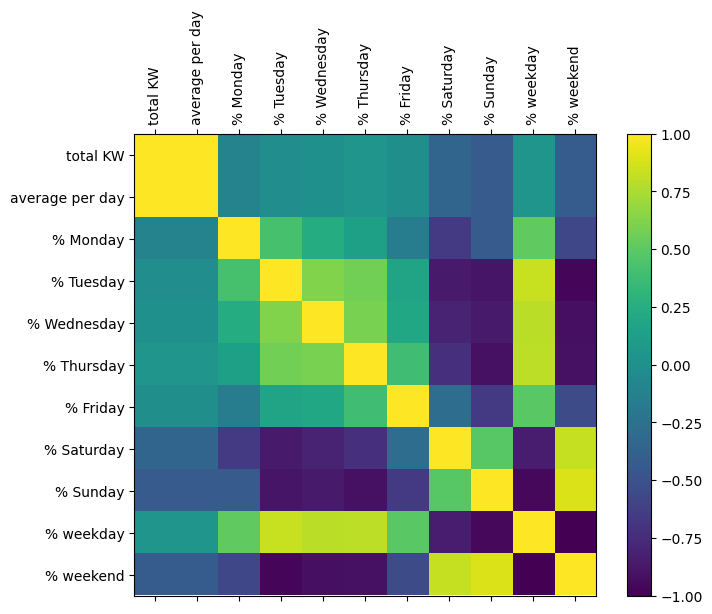

In [12]:
corr = matrix[x_calls].corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax=ax.matshow(corr,vmin=-1,vmax=1)
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.colorbar(cax)

As we can guess "total KW" has strong positive correlation with "average per day". Beside that, "% Saturday" and "% Sunday" also have strong positive correlation with "% weekend" and negative correlation with "% weekday". So does "% Monday" until "% Friday" have positive corralation with "% weekday" and "% weekend".

## Determining the number of cluster

In [13]:
def plot_BIC(matrix,x_calls,K):
    from sklearn import mixture
    BIC=[]
    for k in K:
        model=mixture.GaussianMixture(n_components=k,init_params='kmeans')
        model.fit(matrix[x_calls])
        BIC.append(model.bic(matrix[x_calls]))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(K,BIC,'-cx')
    plt.ylabel("BIC score")
    plt.xlabel("k")
    plt.title("BIC scoring for K-means cell's behaviour")
    return(BIC)

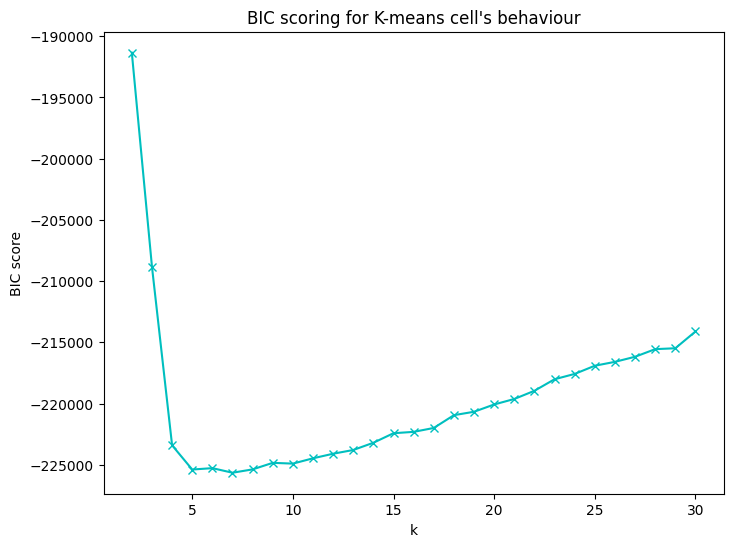

In [14]:
K = range(2,31)
BIC = plot_BIC(matrix,x_calls,K)

By Bayessian Information Criterion (BIC), we decided to segmentate the costumers to be 5 segments.

## Clustering 

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
cluster = KMeans(n_clusters=5,random_state=217)
matrix['cluster'] = cluster.fit_predict(matrix[x_calls])
print(matrix.cluster.value_counts())

0    3679
3    2276
1     385
2      95
4      10
Name: cluster, dtype: int64


Text(0.5, 1.0, 'Cluster of Data')

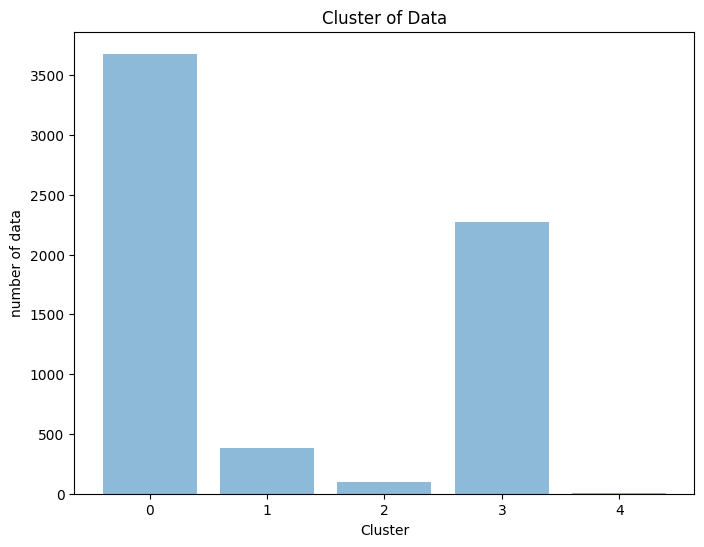

In [16]:
d=pd.DataFrame(matrix.cluster.value_counts())
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(d.index,d['cluster'],align='center',alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('number of data')
plt.title('Cluster of Data')

In [17]:
from sklearn.metrics.pairwise import euclidean_distances
distance = euclidean_distances(cluster.cluster_centers_, cluster.cluster_centers_)
print(distance)

[[ 0.          6.65343979  9.34573136  2.01316909 28.25886777]
 [ 6.65343979  0.          9.82435185  8.64451185 31.68601779]
 [ 9.34573136  9.82435185  0.          9.83882875 30.46869987]
 [ 2.01316909  8.64451185  9.83882875  0.         27.45910269]
 [28.25886777 31.68601779 30.46869987 27.45910269  0.        ]]


The first segment (Cluster 0) contains 95 costumers, the second (Cluster 1) 3747 costumers, the third (Cluster 2) 10 costumers, the fourth (Cluster 3) 2208 costumers, and the fifth (Cluster 4) 385 costumers.

## Visualization Segment

In [18]:
# Reduction dimention of the data using PCA
pca = PCA(n_components=3)
matrix['x'] = pca.fit_transform(matrix[x_calls])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_calls])[:,1]
matrix['z'] = pca.fit_transform(matrix[x_calls])[:,2]

# Getting the center of each cluster for plotting
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y', 'z'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
print(cluster_centers)

           x         y         z  cluster
0   0.285646 -0.244139 -0.018883        0
1   6.897584 -0.321715  0.021218        1
2   3.091673  8.622535 -0.845156        2
3  -1.688837  0.078848  0.102581        3
4 -14.255594  2.118913 -9.273445        4


Text(0.5, 1.0, 'Data Segmentation')

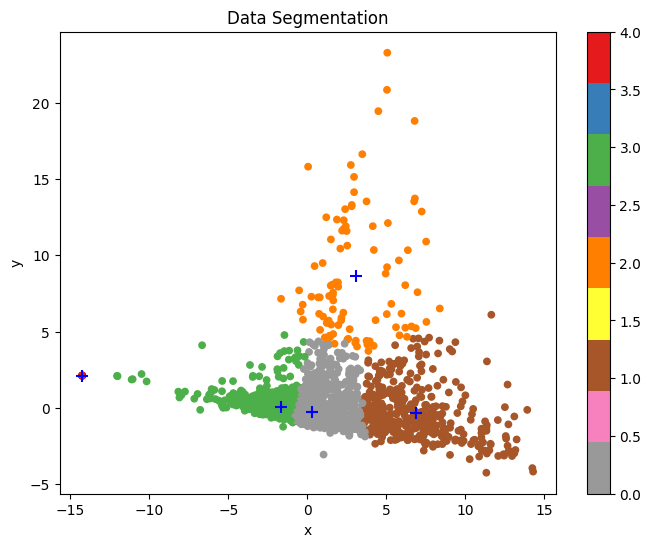

In [19]:
# Plotting for 2-dimention
fig, ax = plt.subplots(figsize=(8, 6))
scatter=ax.scatter(matrix['x'],matrix['y'],c=matrix['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],s=70,c='blue',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.title('Data Segmentation')

Text(0.5, 0.92, 'Data Segmentation')

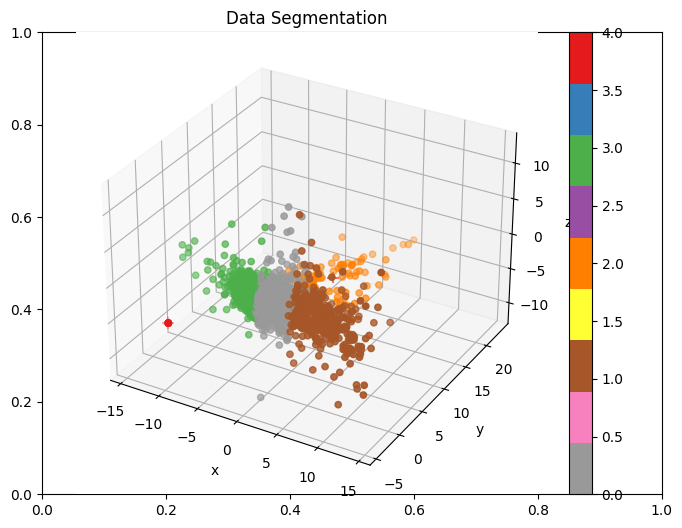

In [20]:
# Plotting for 3-Dimention
fig, ax = plt.subplots(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
scatter=ax.scatter(matrix['x'],matrix['y'],matrix['z'],c=matrix['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],cluster_centers['z'],s=70,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(scatter)
plt.title('Data Segmentation')

By the plots above, we can see that all segments are separated well from each other. It means that BIC method works good for this project.

 ## The behavior of each segment:

In [21]:
data_fix['cluster']=matrix['cluster']
print(data_fix[data_fix.columns[1:]].groupby(['cluster']).agg([np.mean]))

              total KW average per day   % Monday  % Tuesday % Wednesday  \
                  mean            mean       mean       mean        mean   
cluster                                                                    
0         15203.008192       28.363821  14.320383  14.599727   14.471601   
1         38078.381322       71.041756  15.771192  17.997538   17.604645   
2        204513.395071      381.554842  14.399471  14.874050   14.868919   
3         13923.830611       25.977296  13.689986  13.582279   13.515790   
4             0.000000        0.000000   0.000000   0.000000    0.000000   

        % Thursday   % Friday % Saturday   % Sunday  % weekday  % weekend  
              mean       mean       mean       mean       mean       mean  
cluster                                                                    
0        14.369573  14.287714  14.027909  13.923093  72.048998  27.951002  
1        17.419801  16.092402   8.974672   6.139751  84.885578  15.114422  
2        15

In [22]:
list(data_fix[data_fix.cluster==2]['Meter ID'])

[1038,
 1103,
 1177,
 1254,
 1370,
 1401,
 1411,
 1424,
 1457,
 1465,
 1602,
 1826,
 1960,
 1963,
 2024,
 2089,
 2242,
 2339,
 2385,
 2441,
 2459,
 2527,
 2554,
 2609,
 2613,
 2639,
 2750,
 2764,
 2805,
 2823,
 3041,
 3263,
 3317,
 3351,
 3356,
 3370,
 3501,
 3584,
 3636,
 3651,
 3755,
 3800,
 3825,
 3863,
 3864,
 3882,
 3987,
 4047,
 4071,
 4082,
 4122,
 4141,
 4154,
 4168,
 4214,
 4227,
 4343,
 4345,
 4370,
 4408,
 4484,
 4623,
 4767,
 5255,
 5343,
 5419,
 5431,
 5435,
 5801,
 5817,
 5940,
 5946,
 6152,
 6288,
 6329,
 6368,
 6402,
 6423,
 6513,
 6515,
 6609,
 6644,
 6650,
 6689,
 6733,
 6899,
 6927,
 6929,
 7087,
 7168,
 7201,
 7277,
 7304,
 7339,
 7419]

1. Cluster 0 contains only 95 IDs but the average of daily usage and total KW is so high, 381.55 kWh and 304513.39 kWh respectively. They also have activities in all days, the highest in Thursday and Friday. We can guess that Cluster 0 comes from big companies.

2. Cluster 1 is a biggest segment in this project contains 3747 IDs. The average of total electricity usage in observation period is 15161.06 kWh and the average of daily electricity usage is 28.28 kWh. From the percentage of daily usage in weekend or weekdays, we can see that there is no significant different between them. The consumption is about 14%. By this behaviour we can guess that the IDs in Cluster 0 comes from housing or small company that has same activities in all days.

3. Cluster 2 contains 10 IDs that is not observed in this project. It can be seen from the total of electricity usage that is 0 kWh. The IDs not observed in this project are 2083, 2691, 3141, 3348, 4096, 4113, 4447, 5855, 6596, dan 6713.

4. Cluster 4 has 2208 IDs and similar behavior with Cluster 1. It is confirmed by the distance between those centroids. Not only that, the similar behavior also can be seen from the daily electricity usage and the total consumption 26.4 kWh and 13955.61 kWh respectively. However, the percentage of daily using is little bit different eith Cluster 0, in weekdays the percentage is about 13% per day and it increases in weekend becomes about 16%. We can guess that those IDs are constumers comes from housing or small companies who have more activities in weekend rather than weekdays.

5. The IDs in Cluster 5 comes from middle companies who only have activities in weekdays. We can see from the behavior of daily electricity usage where there is significant different between weekdays and weekend. In weekdays, the percentage of electricity usage is about 17% and it become slighly decrease in Monday and Friday. However,it got dramatically decrease in weekend about only 7%.

# 2. Forecasting Using Fbprophet

## Preprocessing data

In this stage for this kernel, we try to forecast for a year ahead only the electricity usage of each segment, except Cluster 2, and the total electricity usage of all costumers using a simple and very nice library developed by Facebook name[](http://)d Fbprophet. The theory with a very good description of the math/statistical approach behind the library can be seen in https://facebook.github.io/prophet/.

In [23]:
data_cluster=data_fix[['Meter ID','cluster']]
data_forc=pd.DataFrame({'ds':pd.to_datetime(data['date'])})

In [24]:
for k in range(len(cluster_centers)):
    data_clus=data_cluster[data_cluster['cluster']==k]
    del data_clus['cluster']
    s1="cluster "+str(k)
    data_forc[s1]=0
    for i in list(data_clus.iloc[:,0]):
        s2="ID"+str(i)
        data_forc[s1]+=data[s2]
data_forc=data_forc.fillna(0)

In [25]:
data_forc_0=data_forc[['ds','cluster 0']]
data_forc_0.columns=['ds','y']

data_forc_1=data_forc[['ds','cluster 1']]
data_forc_1.columns=['ds','y']

data_forc_2=data_forc[['ds','cluster 2']]
data_forc_2.columns=['ds','y']

data_forc_3=data_forc[['ds','cluster 3']]
data_forc_3.columns=['ds','y']

data_forc_4=data_forc[['ds','cluster 4']]
data_forc_4.columns=['ds','y']

data_forc_all=pd.DataFrame({'ds':data_forc['ds']})
data_forc_all['y']=data_forc['cluster 0']+data_forc['cluster 1']+data_forc['cluster 2']+data_forc['cluster 3']+data_forc['cluster 4']

In [26]:
def plot_data(data_forc):
    timeseries=data_forc.copy()
    timeseries.columns=['date','Total Daily KW']
    timeseries = timeseries.set_index('date') 
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.scatter(timeseries.index,timeseries['Total Daily KW'],c='black',s=2)

## Developing Function for Modelling 

In [31]:
import prophet as fbprophet
from sklearn.metrics import mean_squared_error, r2_score
def predic_fbp(data_forc,n_days):
    ny=pd.DataFrame({'holiday':"New Year's Day",'ds':pd.to_datetime(['2010-01-01','2011-01-01','2012-01-01']),
                     'lower_window':-1,'upper_window':1,})
    ch=pd.DataFrame({'holiday':"Christmas",'ds':pd.to_datetime(['2009-12-25','2010-12-25','2011-12-25','2012-12-25']),
                     'lower_window':0,'upper_window':1,})
    holidays=pd.concat([ny,ch])
    model = fbprophet.Prophet(daily_seasonality=False,weekly_seasonality=True,
                yearly_seasonality=True,changepoint_prior_scale=0.05,changepoints=None,
                holidays=holidays,interval_width=0.95)
    model.add_seasonality(name='monthly',period=30.5,fourier_order=5)
    size = len(data_forc) - n_days
    train, test = data_forc[0:size], data_forc[size:]
    test_=test.set_index('ds')
    model.fit(train)
    predics=model.predict(data_forc)
    test=pd.merge(test,predics[['ds','yhat','yhat_lower','yhat_upper']],how='left',on='ds')
    train=pd.merge(train,predics[['ds','yhat','yhat_lower','yhat_upper']],how='left',on='ds')
    RMSE=np.sqrt(mean_squared_error(test['y'], test['yhat']))
    print('RMSE = %.2f' % RMSE)
    R2=r2_score(test['y'], test['yhat'])
    print('R Square = %.2f'% R2)
    future = model.make_future_dataframe(periods=365+n_days, freq='D')
    future=model.predict(future)
    fig=model.plot(predics)
    plt.scatter(test_.index,test_['y'],c='black',s=7)
    fig2=model.plot(future)
    plt.scatter(test_.index,test_['y'],c='black',s=7)
    fig3=model.plot_components(future)
    return(train,test,predics,future,RMSE,R2)

In forecasting, we use 446 first days, from July 14 2009 to October 02 2010, as a training data and 90 last day , from October 03 2010 to December 31 2010, as a validation data. We also added the holiday effects, Chistmas at December 25-26 and New Year at December 31 - January 02, on the model.

For accuracy, we use Root Mean Square Error (RMSE) and R-Squared (R2) to asses the model.

## The Forecasting of Cluster 0

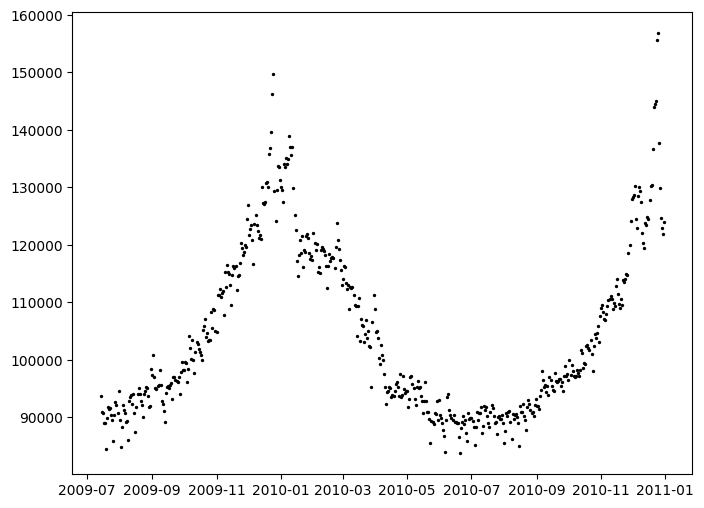

In [32]:
plot_data(data_forc_0)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\oh53tf93.json
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\yo1r41tl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\pushp\\anaconda3\\envs\\timeseries\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=62126', 'data', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\oh53tf93.json', 'init=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\yo1r41tl.json', 'output', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\prophet_model2c8900uf\\prophet_model-20230304153047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:48 - cmdstanpy - INFO - Chain [1] done pr

RMSE = 5438.91
R Square = 0.85


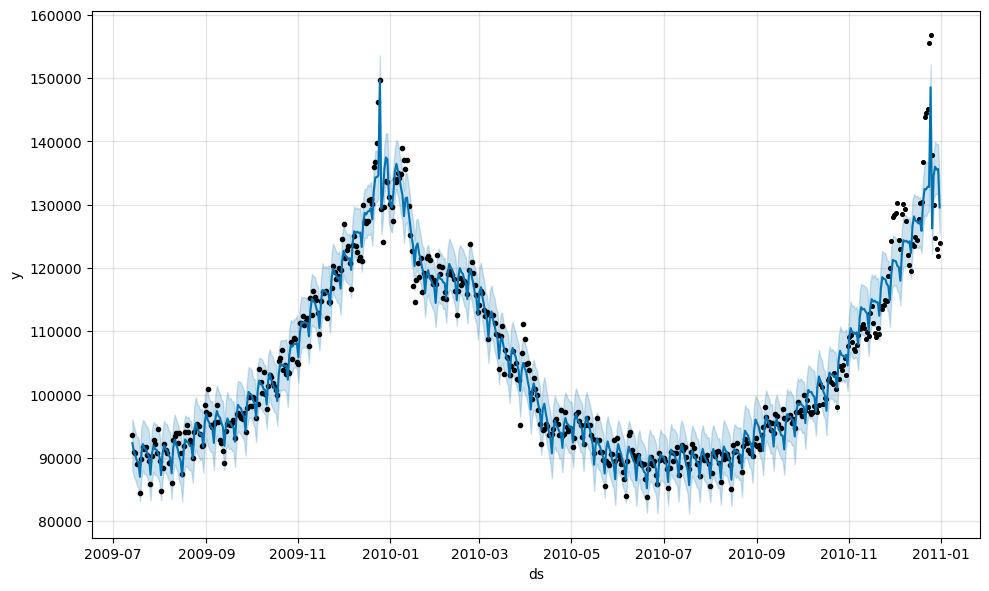

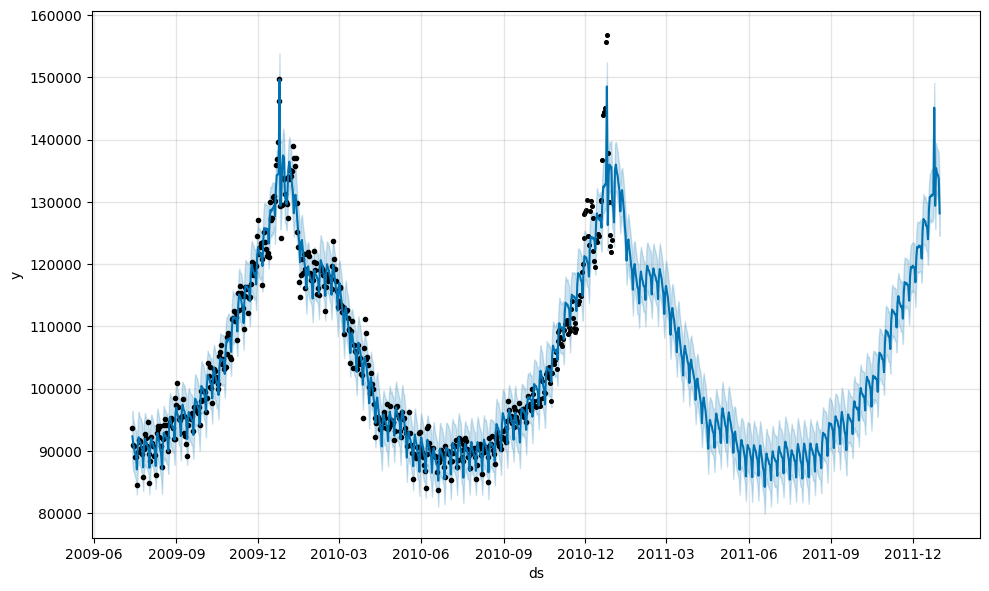

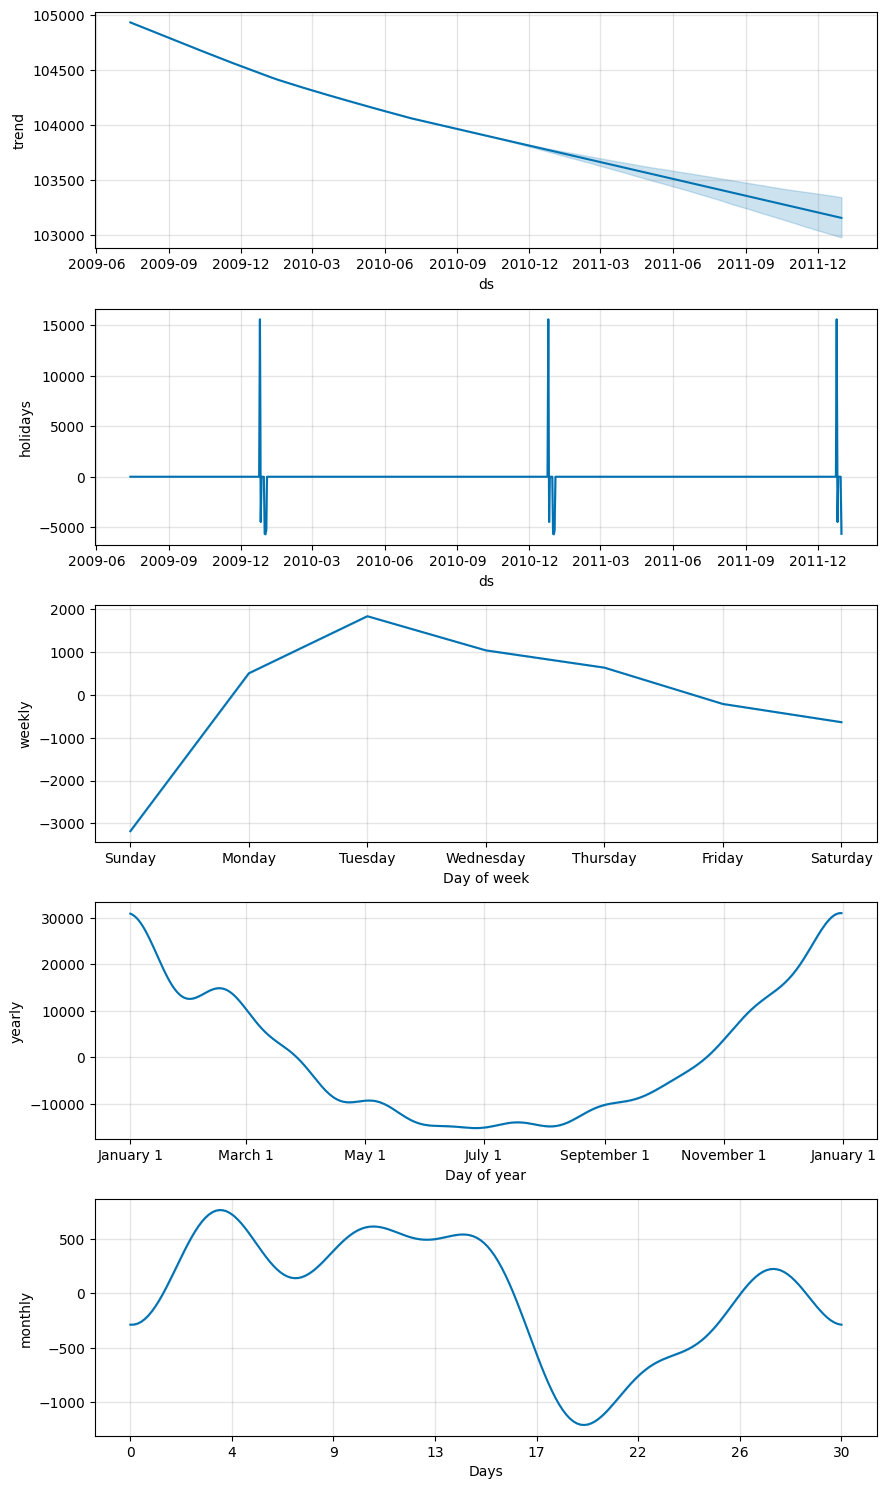

In [33]:
train_0,test_0,predics_0,future_0,RMSE_0,R2_0=predic_fbp(data_forc_0,90)

The trend of electricity usage in this cluster is linearly decreasing with the highest usage in December and January and the lowest in June. R Squared of this prediction is not really good only 64% but the RMSE is good with 1637.01.

## The Forecasting of Cluster 1

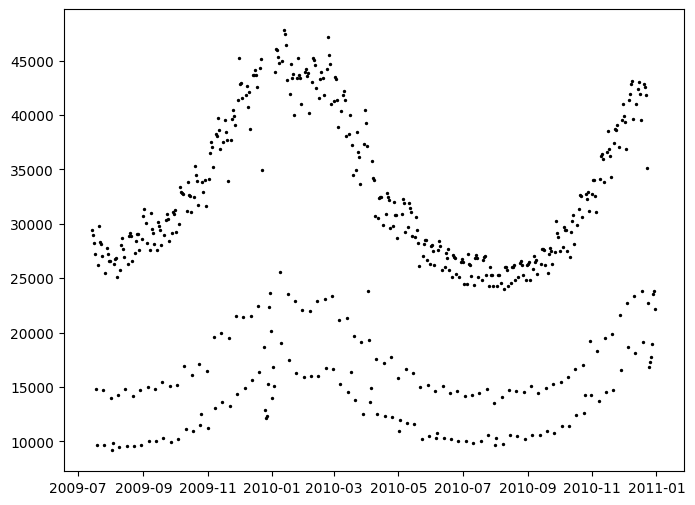

In [34]:
plot_data(data_forc_1)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\zvj18o96.json
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\penp4q3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\pushp\\anaconda3\\envs\\timeseries\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=75578', 'data', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\zvj18o96.json', 'init=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\penp4q3d.json', 'output', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\prophet_modelqc3kyw_v\\prophet_model-20230304153050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:50 - cmdstanpy - INFO - Chain [1] done pr

RMSE = 4589.47
R Square = 0.77


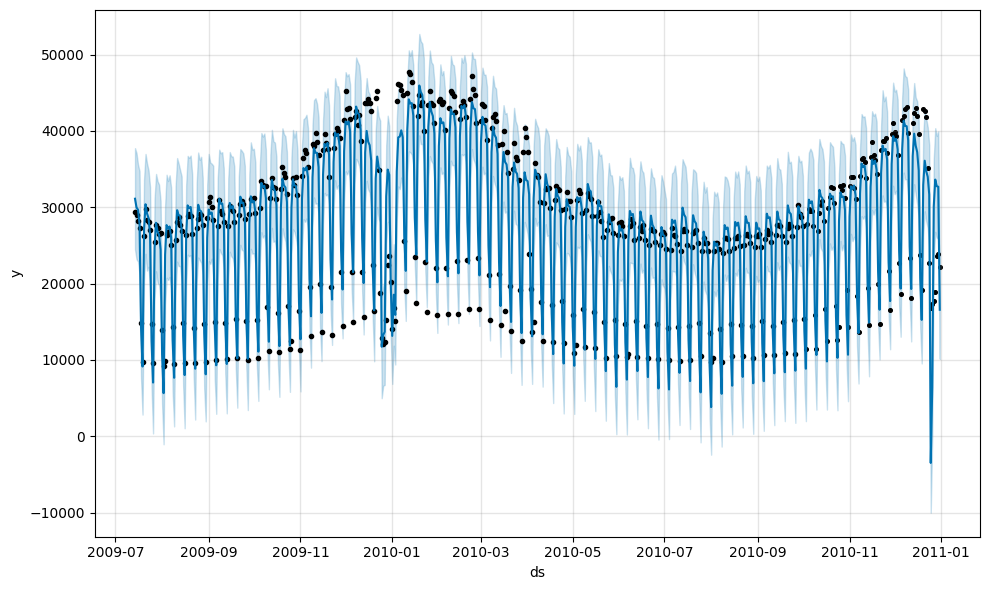

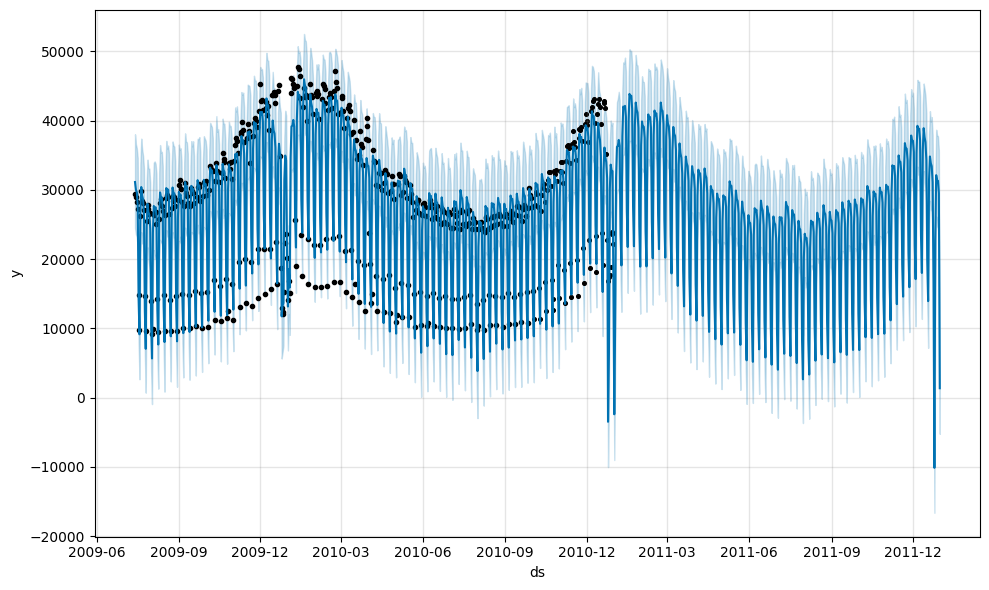

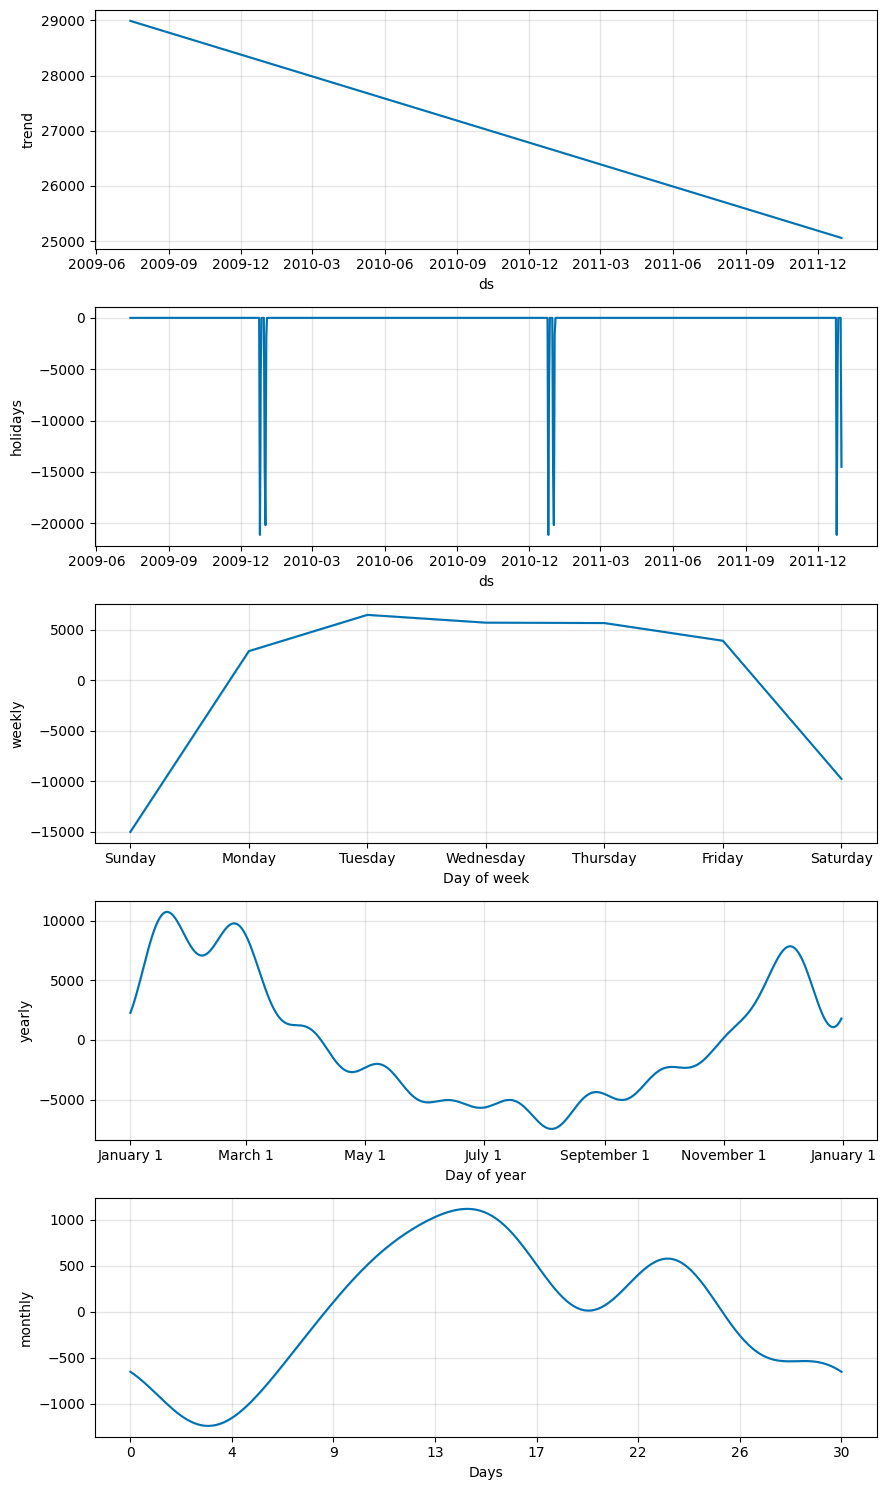

In [35]:
train_1,test_1,predics_1,future_1,RMSE_1,R2_1=predic_fbp(data_forc_1,90)

The trend of electricity usage in this cluster is also decreasing with the same highest usage with Cluster 0 in December and January and the lowest in about July. R Squared of this prediction is good 84% and the RMSE is about 5531.48.

## The Forecasting of Cluster 3

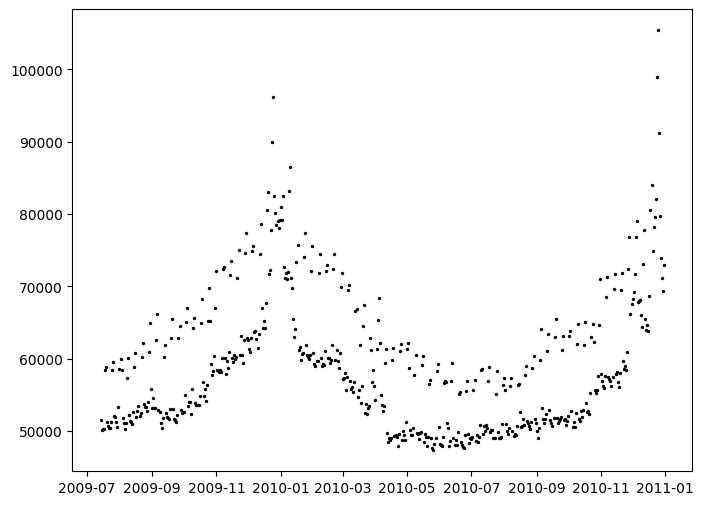

In [36]:
plot_data(data_forc_3)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\phc9i7hr.json
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\v29n52wf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\pushp\\anaconda3\\envs\\timeseries\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=4047', 'data', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\phc9i7hr.json', 'init=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\v29n52wf.json', 'output', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\prophet_modelb81vta76\\prophet_model-20230304153052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:52 - cmdstanpy - INFO - Chain [1] done pro

RMSE = 4523.71
R Square = 0.82


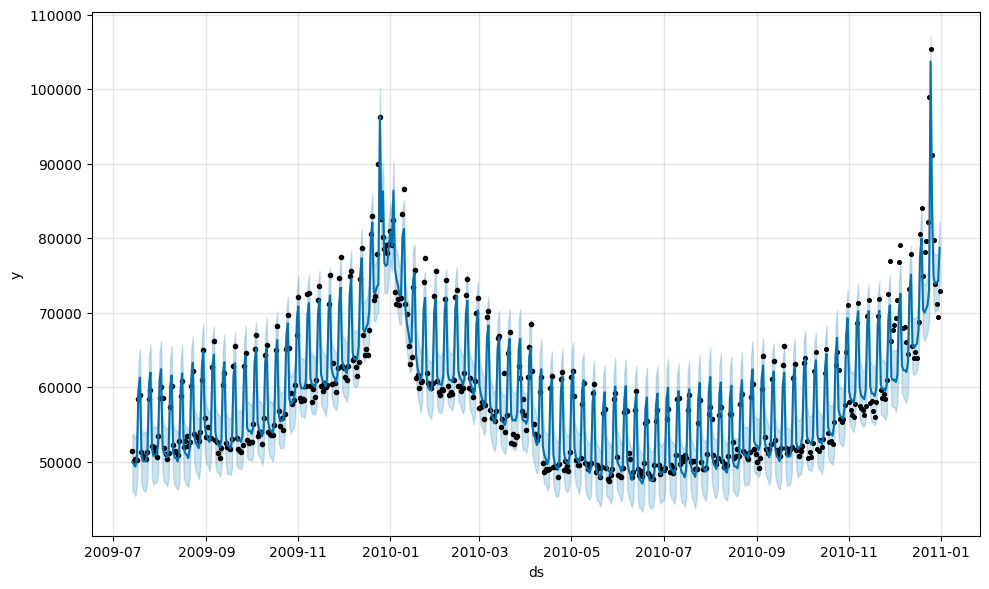

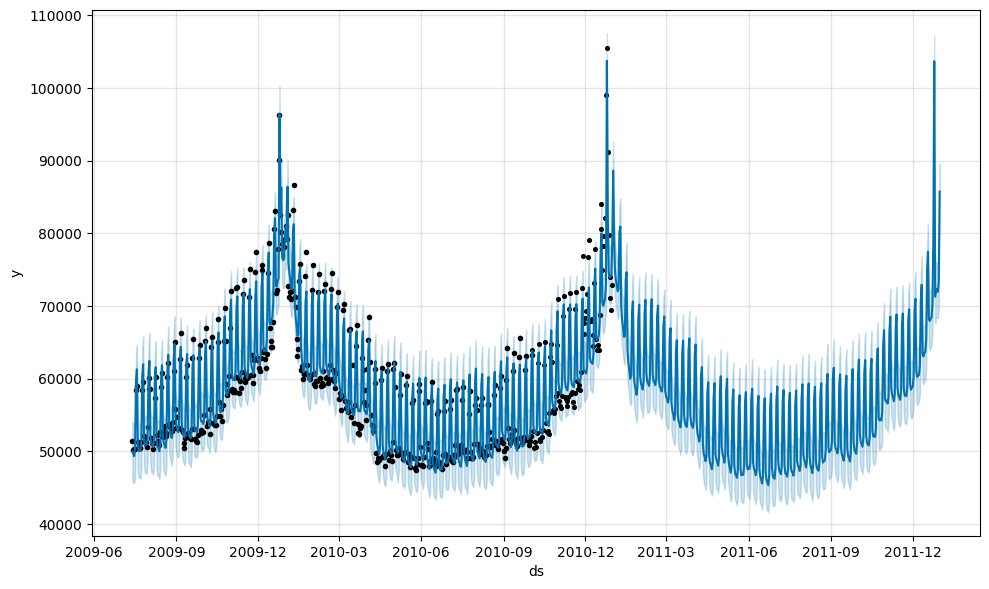

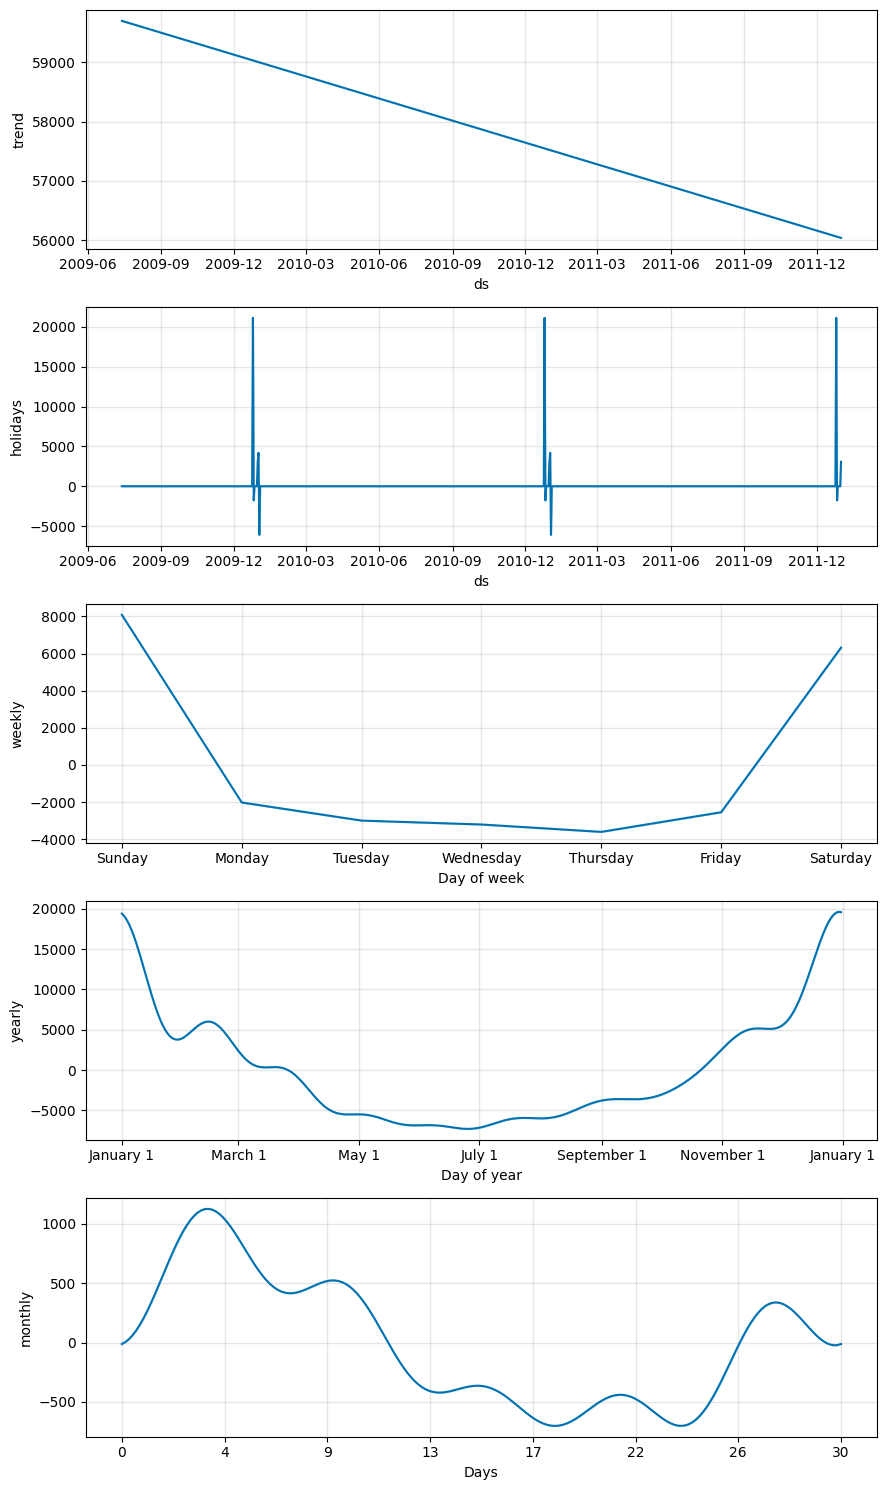

In [37]:
train_3,test_3,predics_3,future_3,RMSE_3,R2_3=predic_fbp(data_forc_3,90)

The trend of electricity usage in this cluster is also linearly decreasing with the highest usage in January and the lowest in about June. R Squared of this prediction is good 82% and the RMSE is 4439.82.

## The Forecasting of Cluster 4

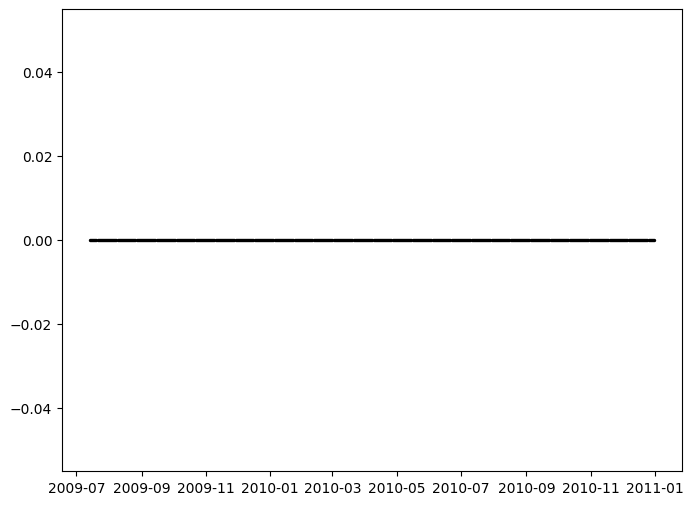

In [38]:
plot_data(data_forc_4)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path


RMSE = 0.00
R Square = 1.00


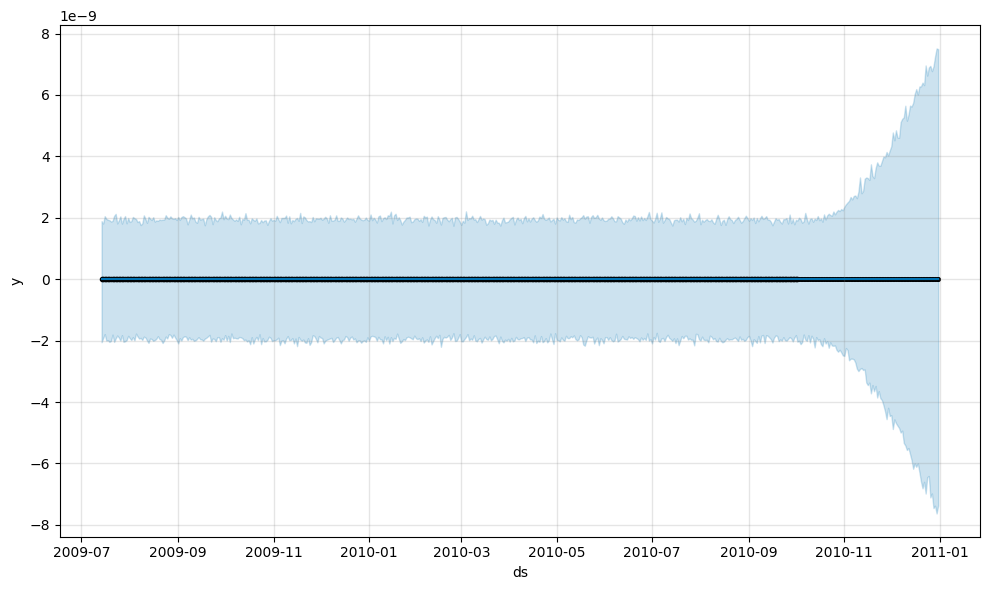

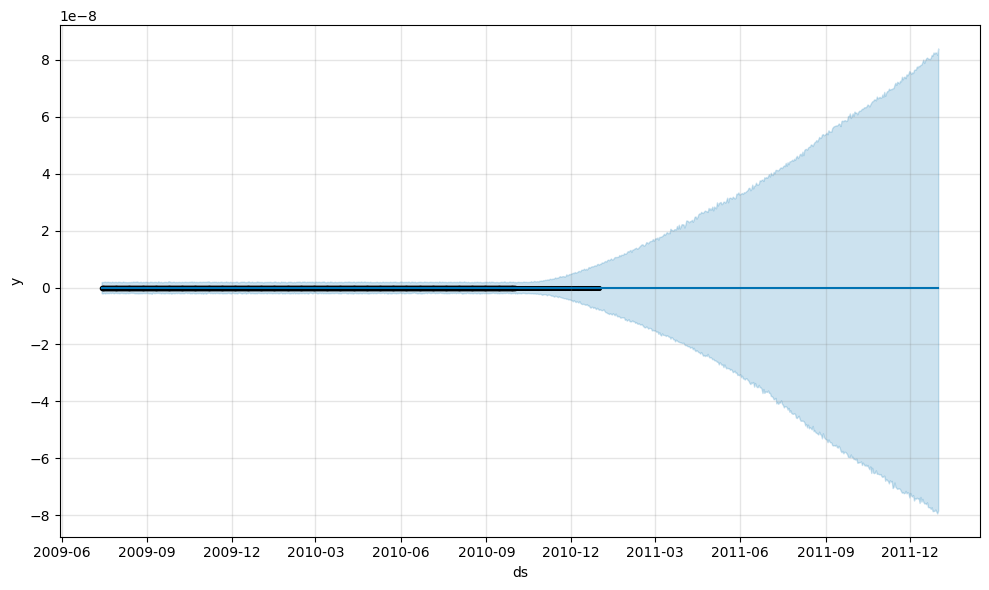

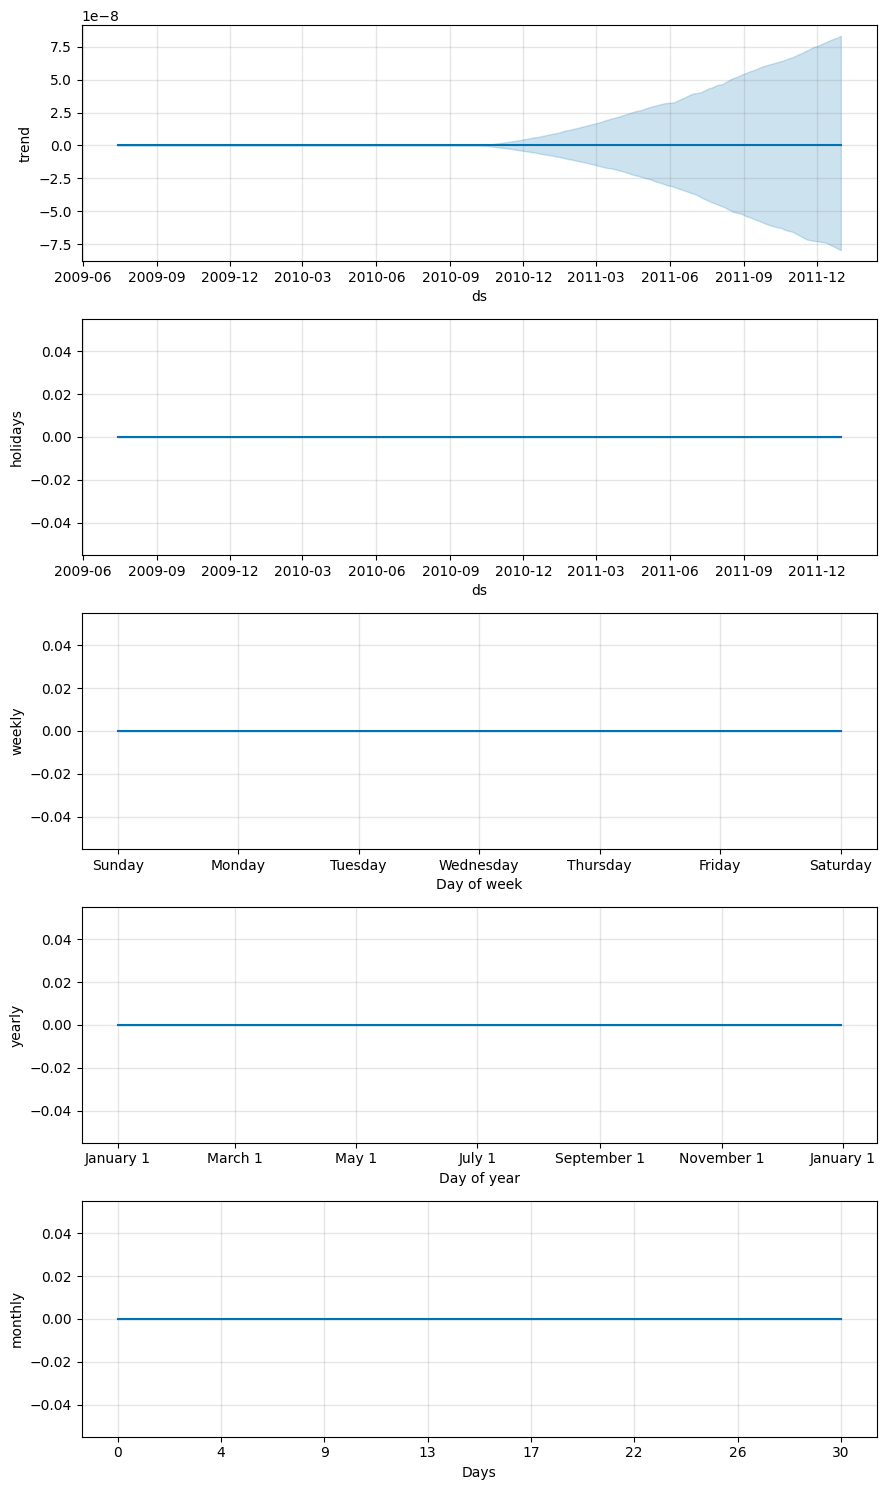

In [39]:
train_4,test_4,predics_4,future_4,RMSE_4,R2_4=predic_fbp(data_forc_4,90)

The trend of electricity usage in this cluster is also linearly decreasing with the highest usage in January and the lowest in about August. R Squared of this prediction is good enough 77% and the RMSE is 4589.76.

## The Forecasting of All Costumers

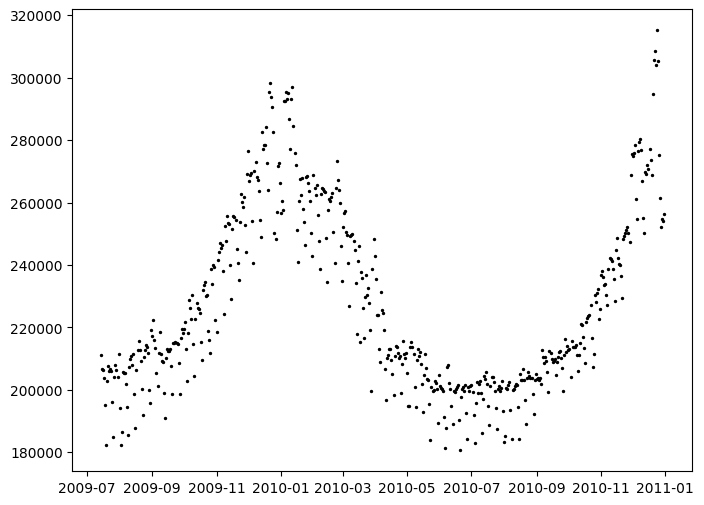

In [40]:
plot_data(data_forc_all)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\hjo_6zv1.json
DEBUG:cmdstanpy:input tempfile: C:\Users\pushp\AppData\Local\Temp\tmp6btyizgc\yh4nmesa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\pushp\\anaconda3\\envs\\timeseries\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=24993', 'data', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\hjo_6zv1.json', 'init=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\yh4nmesa.json', 'output', 'file=C:\\Users\\pushp\\AppData\\Local\\Temp\\tmp6btyizgc\\prophet_modelp7t3zl55\\prophet_model-20230304153056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:56 - cmdstanpy - INFO - Chain [1] done pr

RMSE = 12131.69
R Square = 0.79


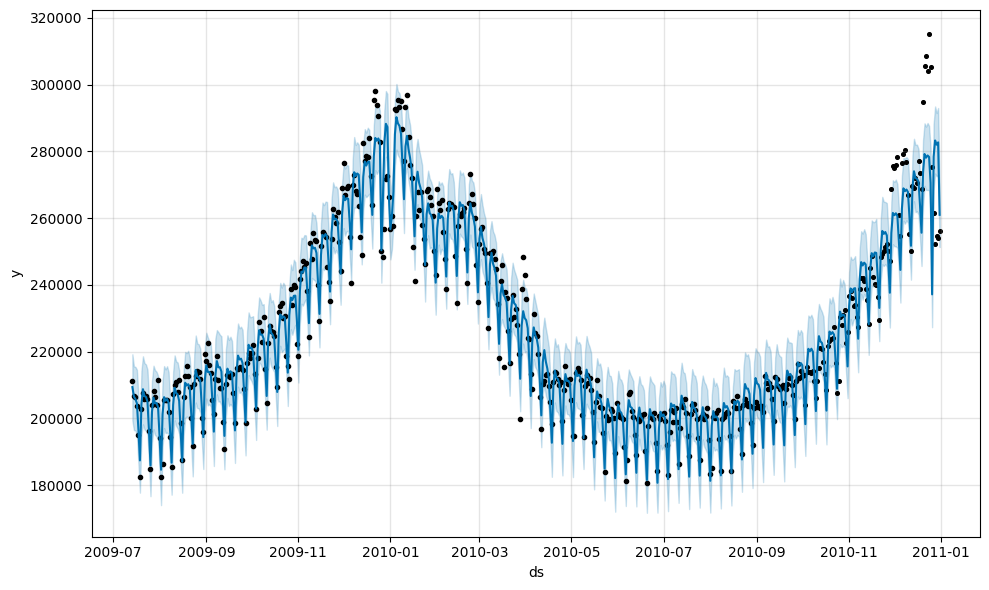

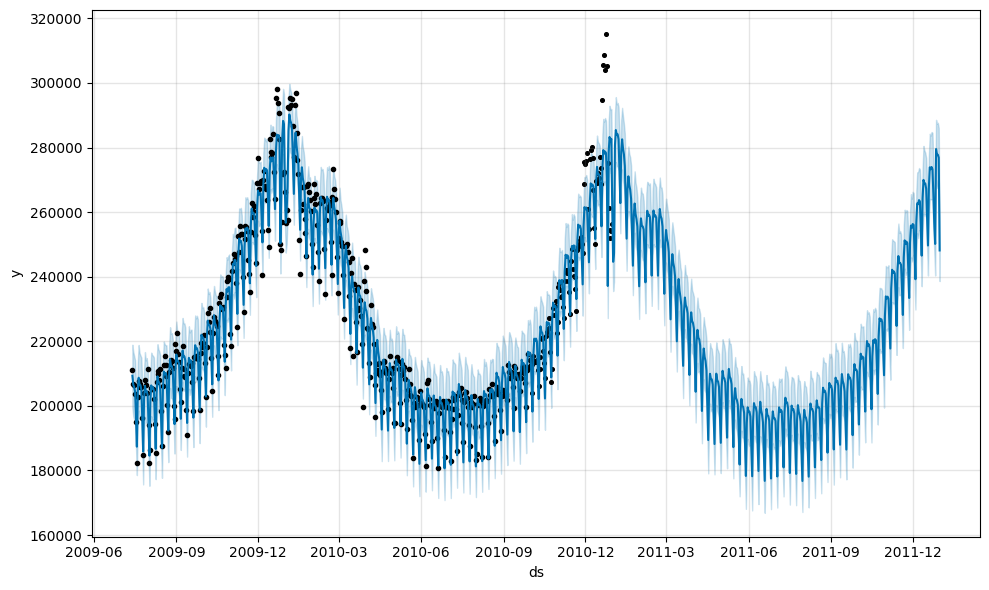

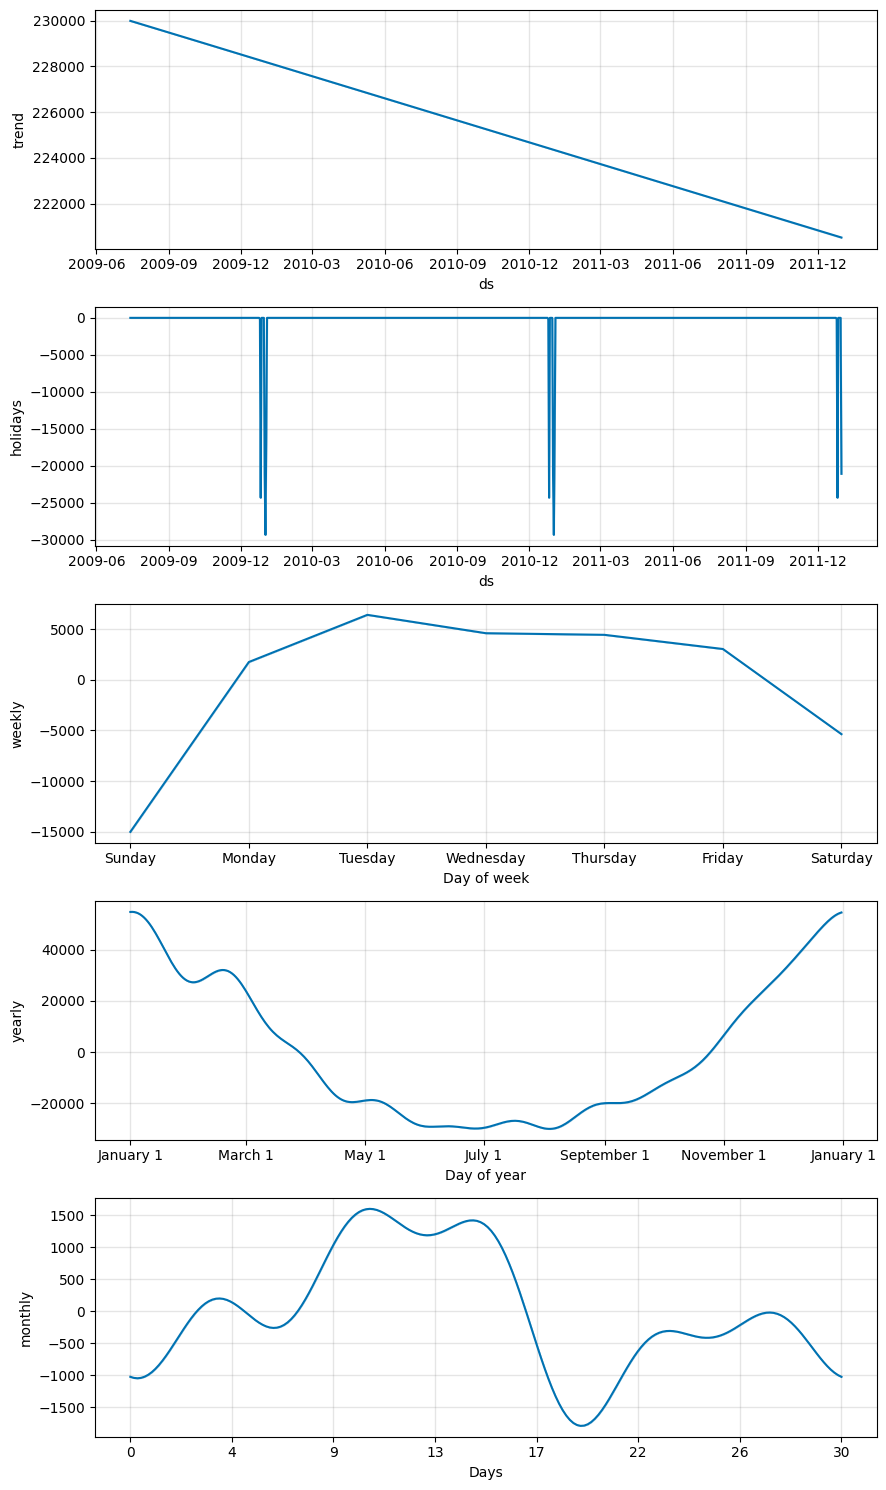

In [41]:
train_all,test_all,predics_all,future_all,RMSE_all,R2_all=predic_fbp(data_forc_all,90)

Overall, the trend of electricity usage is linearly decreasing with the highest usage in January and the lowest in about June. R Squared of this prediction is good enough 79% but the RMSE is 12125.71.